# Project-4: classification

In [3975]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Part 1. Getting to know data, handling missed values and outliers

Нам предоставили данные о последней маркетинговой кампании, которую проводил банк: задачей было привлечь клиентов для открытия депозита. Мы должны проанализировать эти данные, выявить закономерность и найти решающие факторы, повлиявшие на то, что клиент вложил деньги именно в этот банк. Если мы сможем это сделать, то поднимем доходы банка и поможем понять целевую аудиторию, которую необходимо привлекать путём рекламы и различных предложений.

### Task 1

In [3976]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [3977]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


__Данные о клиентах банка:__

- age (возраст);
- job (сфера занятости);
- marital (семейное положение);
- education (уровень образования);
- default (имеется ли просроченный кредит);
- housing (имеется ли кредит на жильё);
- loan (имеется ли кредит на личные нужды);
- balance (баланс).

__Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:__

- contact (тип контакта с клиентом);
- month (месяц, в котором был последний контакт);
- day (день, в который был последний контакт);
- duration (продолжительность контакта в секундах).

__Прочие признаки:__

- campaign (количество контактов с этим клиентом в течение текущей кампании);
- pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
- previous (количество контактов до текущей кампании)
- poutcome (результат прошлой маркетинговой кампании).

__И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.__

In [3978]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
print(f"Number of empty values of the feature 'balance' - {sum(df.balance.isnull())}")

Number of empty values of the feature 'balance' - 25


### Task 2

In [3979]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Task 3

In [3980]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].str.replace(' \$ ','').str.replace(' ','').str.replace(',','.').astype(float)

In [3981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11137 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


### Task 4

In [3982]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'].fillna(df['balance'].median(), inplace = True)

### Task 5

In [3983]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [3984]:
#replacing all "unkwown" values of the "job" feature with a modal value of the feature
df.job.replace('unknown', df.job.mode()[0], inplace=True)

#replacing all "unkwown" values of the "education" feature with a modal value of the feature
df.education.replace('unknown', df.education.mode()[0], inplace=True)

# checking updated values to ensure that "unkown" value of the "education" feature converted to the modal value, which is "secondary" in our case
df.education.value_counts()

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

### Task 6

<AxesSubplot: >

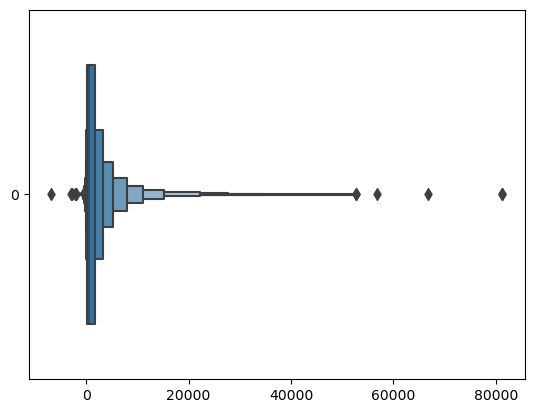

In [3985]:
# удалите все выбросы для признака balance

# drawing a boxplot to better understanding how do outliers look like before processing this feature
sns.boxenplot(df.balance, orient = 'h', width = 0.7, )


In [4031]:
# defining a function that will take a dataframe and a feature as an input and that will return the lower_bound, upper_bound, 
# new dataframe cleaned of outliers (items outside the bounds)

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return lower_bound, upper_bound, cleaned

In [4032]:
# determining the bounds and creating cleaned dataframe by applying the function created above
lower_bound, upper_bound, data = outliers_iqr(df, 'balance')
data.shape

(10105, 17)

<AxesSubplot: >

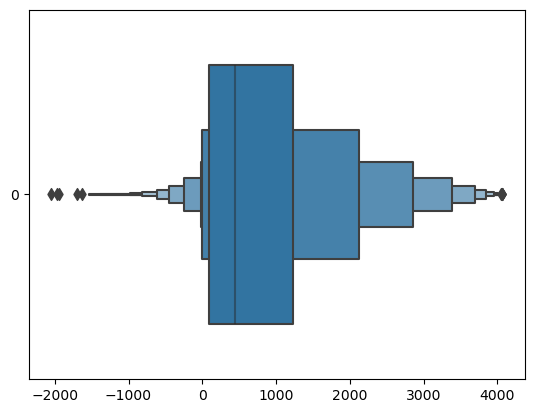

In [3988]:
# drawing a new boxplots to see the new result
sns.boxenplot(data.balance, orient = 'h', width = 0.7)

## Part 2:  Exploratory data analysis

### Task 1

[Text(0.5, 1.0, 'How many people refused to open a deposit vs those who agreed')]

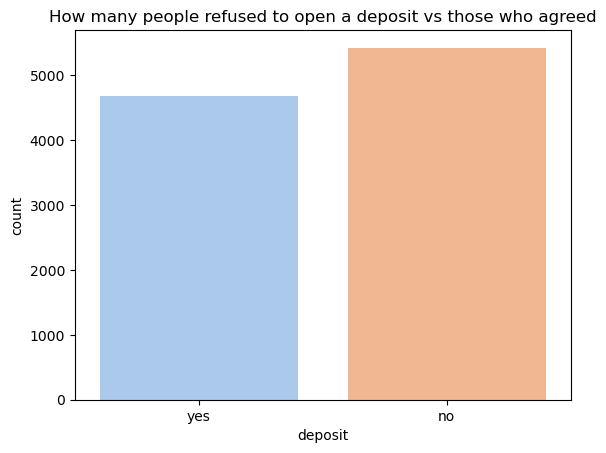

In [3989]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат

sns.countplot(data=data, x='deposit', palette='pastel').set(title="How many people refused to open a deposit vs those who agreed")

### Tasks 2 и 3

In [3990]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
data.describe()
#TODO

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### Tasks 4 и 5

In [3991]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат

# creating an empty list which we will fill with names of category features
category_features = []
for i in data.columns:
    if data[i].dtype == 'object':
        category_features.append(i)

data[category_features].describe()

#постройте визуализации, иллюстрирующие результаты
#TODO

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


### Task 6

[Text(0.5, 1.0, 'Success of current campaign depending on success of previous campaign')]

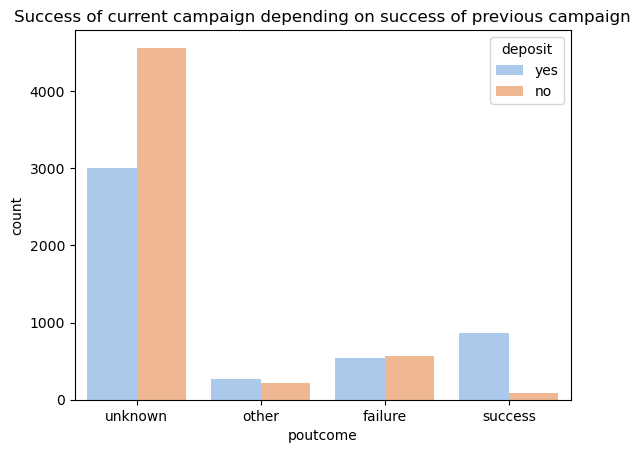

In [3992]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.

sns.countplot(data=data, x='poutcome', hue='deposit', palette='pastel').set(title="Success of current campaign depending on success of previous campaign")

We can clearly see that success of the existing campaign (deposit == yes) is the biggest (in relative terms) among those who accepted the offer of previous campaign.

__Attention__: it is not clear at this point what does "unknown" exactly represent for the feature "poutcome", since they represent the biggest population, they might influence the analysis considerably should they be allocated to failure/success category. If this category fully consists on new clients who were not targetted in the previous campaign, then majority of those people rejected the offer of current campaign. So if the bank wants to target only with high rate of conversion, best approach is target those clients who accepted the last time.

### Task 7

In [3993]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит

# creating a pivot table, that will return count of clients per month, splitted between those who acepted and who rejected
data_grouped = data.pivot_table(
    values='age',
    index='month',
    columns='deposit',
    aggfunc='count',
    margins=True,
    margins_name="total"
).reset_index()

# getting rid of total row with iloc
data_grouped = data_grouped.iloc[:-1, :]

# removing unnecessary columns of those who accepted
data_grouped.drop('yes', axis = 1, inplace=True)
# data_grouped.drop(columns=['deposit'], axis = 1, inplace=True) #TODO cannot remove "deposit" column why?

# determing the share of rejected per each month
data_grouped['share'] = round(data_grouped['no'] / data_grouped['total'],2)

# top months with biggest shares of rejection
data_grouped.sort_values('share', ascending=False).head(3)

deposit,month,no,total,share
8,may,1776,2617,0.68
4,jan,194,319,0.61
5,jul,836,1418,0.59


Based on the above analysis, it is clear that May provided the worst conversion throughout the year and should not be targeted.

### Task 8

In [3994]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 99999], labels=["<30", "30-40", "40-50", "50-60", "60+"])

[Text(0.5, 1.0, 'Success of campaign in different age groups')]

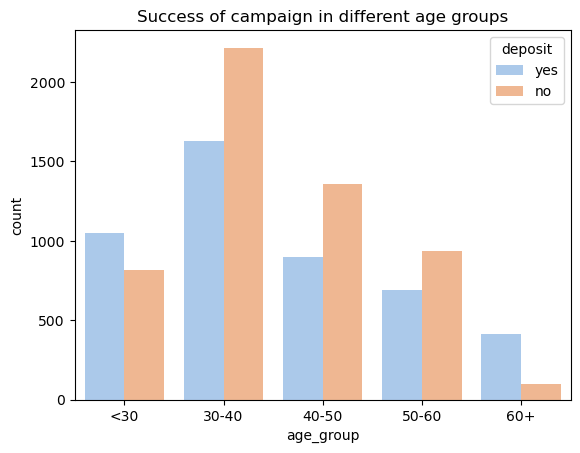

In [3995]:
# counting number of people in each age group who accepted/rejected the offer

sns.countplot(data=data, x='age_group', hue='deposit', palette='pastel').set(title="Success of campaign in different age groups")

Based on the above, we can clearly see that conversion is the one in 60+ category. Second succesfull category is <30. In other categories (age between 30 and 60 inclusive), there are more rejections than acceptannces

### Tasks 9 и 10

[Text(0.5, 1.0, 'Success of campaign in different marital status')]

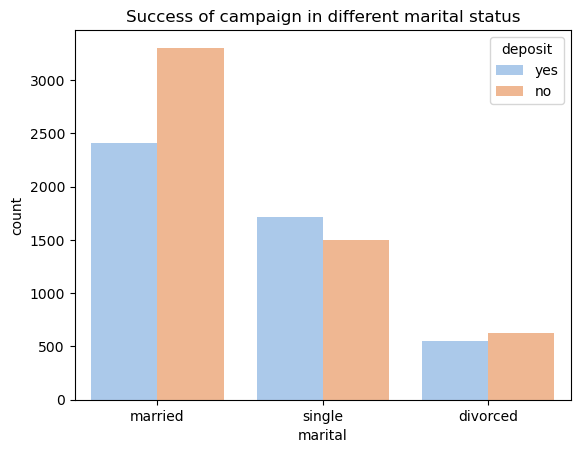

In [3996]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

sns.countplot(data=data, x='marital', hue='deposit', palette='pastel').set(title="Success of campaign in different marital status")

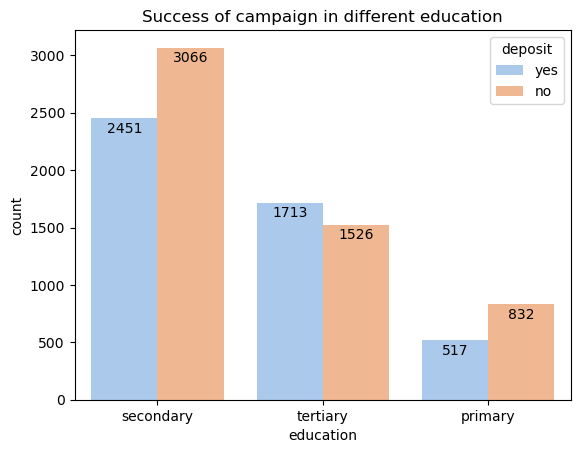

In [3997]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

ax = sns.countplot(data=data, x='education', hue='deposit', palette='pastel')
ax.set(title="Success of campaign in different education")

# annotate bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()-150),
                ha='center', va='bottom', fontsize=10)


plt.show()

[Text(0.5, 1.0, 'Success of campaign in different job status')]

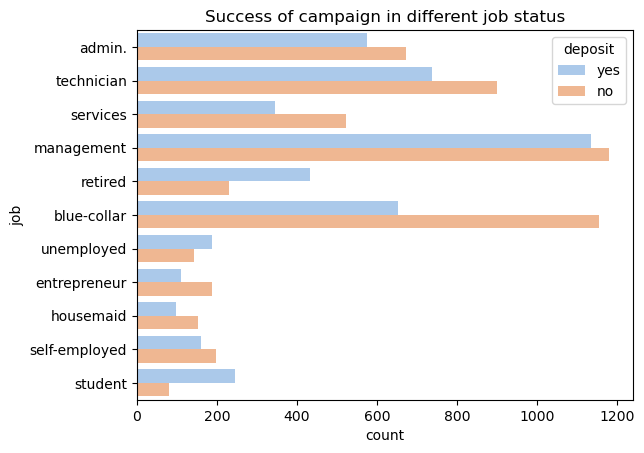

In [3998]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

sns.countplot(data=data, y='job', hue='deposit', palette='pastel').set(title="Success of campaign in different job status")

Positive conversion* in the following groups:
- single persons;
- with tertiary education;
- studends, or
- retired, or
- umemployed

_*Positive conversion_ means number of acceptances bigger than number of rejections

### Task 11

In [3999]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

data_grouped = data[data.deposit == 'yes'].pivot_table(
    values='deposit',
    index='marital',
    columns='education',
    aggfunc='count',
    fill_value=0
)

data_grouped

education,primary,secondary,tertiary
marital,,,
divorced,96,283,174
married,339,1289,784
single,82,879,755


Text(0.5, 1.0, 'Number of acceptances in various "job-marital status" pairs')

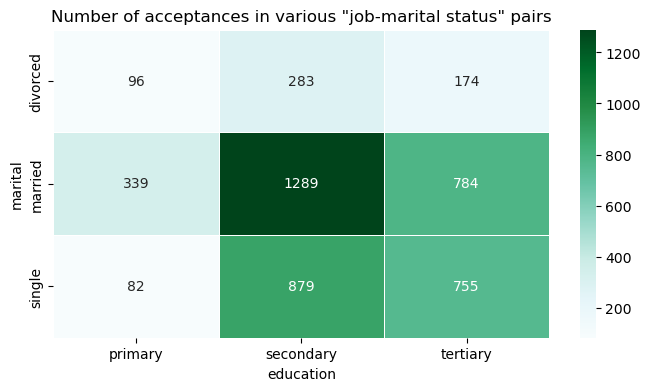

In [4000]:
# building a heatmap to visualize the outcome
f, ax = plt.subplots(figsize=(8,4))
sns.heatmap(data=data_grouped, annot=True, fmt='d', linewidths=.5, ax=ax, cmap='BuGn').set_title('Number of acceptances in various "job-marital status" pairs')

In [4001]:
# for those who rejected the offer
data_grouped = data[data.deposit == 'no'].pivot_table(
    values='deposit',
    index='marital',
    columns='education',
    aggfunc='count',
    fill_value=0
)

data_grouped

education,primary,secondary,tertiary
marital,,,
divorced,91,370,163
married,641,1830,832
single,100,866,531


Text(0.5, 1.0, 'Number of rejections in various "job-marital status" pairs')

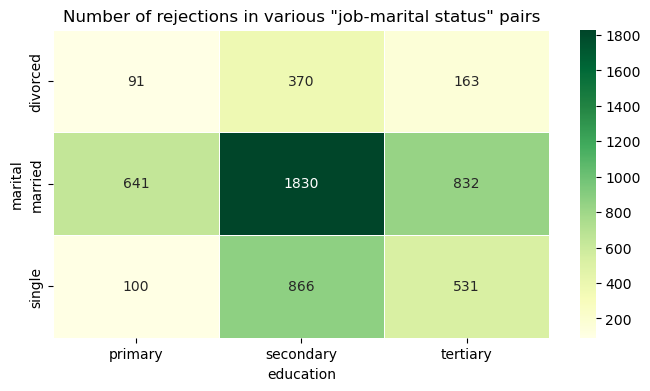

In [4002]:
# building a heatmap to visualize the outcome
f, ax = plt.subplots(figsize=(8,4))
sns.heatmap(data=data_grouped, annot=True, fmt='d', linewidths=.5, ax=ax, cmap='YlGn').set_title('Number of rejections in various "job-marital status" pairs')

## Part 3: преобразование данных

### Task 1

In [4003]:
# преобразуйте уровни образования
# looking again at the education categories that we have
data.education.value_counts()

secondary    5517
tertiary     3239
primary      1349
Name: education, dtype: int64

In [4004]:
# initiating encoder
labelEncoder = preprocessing.LabelEncoder()

# applying encoder to education feature directly
data.education = labelEncoder.fit_transform(data.education)

# checking the new result
data.education.value_counts()

1    5517
2    3239
0    1349
Name: education, dtype: int64

### Tasks 2 и 3

In [4005]:
# преобразуйте бинарные переменные в представление из нулей и единиц
data.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60
1,56,admin.,married,1,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60
2,41,technician,married,1,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50
3,55,services,married,1,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60
4,54,admin.,married,2,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60
5,42,management,single,2,no,0.0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,40-50
6,56,management,married,2,no,830.0,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,50-60


In [4006]:
# creating a list of all binary features
binary_features = ['default', 'housing', 'loan', 'deposit']

# applying encoder for each of the above features
for feature in binary_features:
    data[feature] = labelEncoder.fit_transform(data[feature])

# checking the new result to compare with what we had before
data.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1,50-60
1,56,admin.,married,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1,50-60
2,41,technician,married,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1,40-50
3,55,services,married,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1,50-60
4,54,admin.,married,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1,50-60
5,42,management,single,2,0,0.0,1,1,unknown,5,may,562,2,-1,0,unknown,1,40-50
6,56,management,married,2,0,830.0,1,1,unknown,6,may,1201,1,-1,0,unknown,1,50-60


### Task 4

In [4007]:
# создайте дамми-переменные
dummy_features = ['job', 'marital', 'contact', 'month', 'poutcome']
dummy_data = pd.get_dummies(data[dummy_features])

In [4008]:
# merging original data with dummy_data
data = pd.concat([data, dummy_data], axis = 1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,56,admin.,married,1,0,45.0,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,41,technician,married,1,0,1270.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,55,services,married,1,0,2476.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,54,admin.,married,2,0,184.0,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [4009]:
# getting rid of the features that we decoded above
data.drop(dummy_features, axis = 1, inplace=True)
data.drop('age_group', axis=1, inplace=True)

### Tasks 5 и 6

<AxesSubplot: >

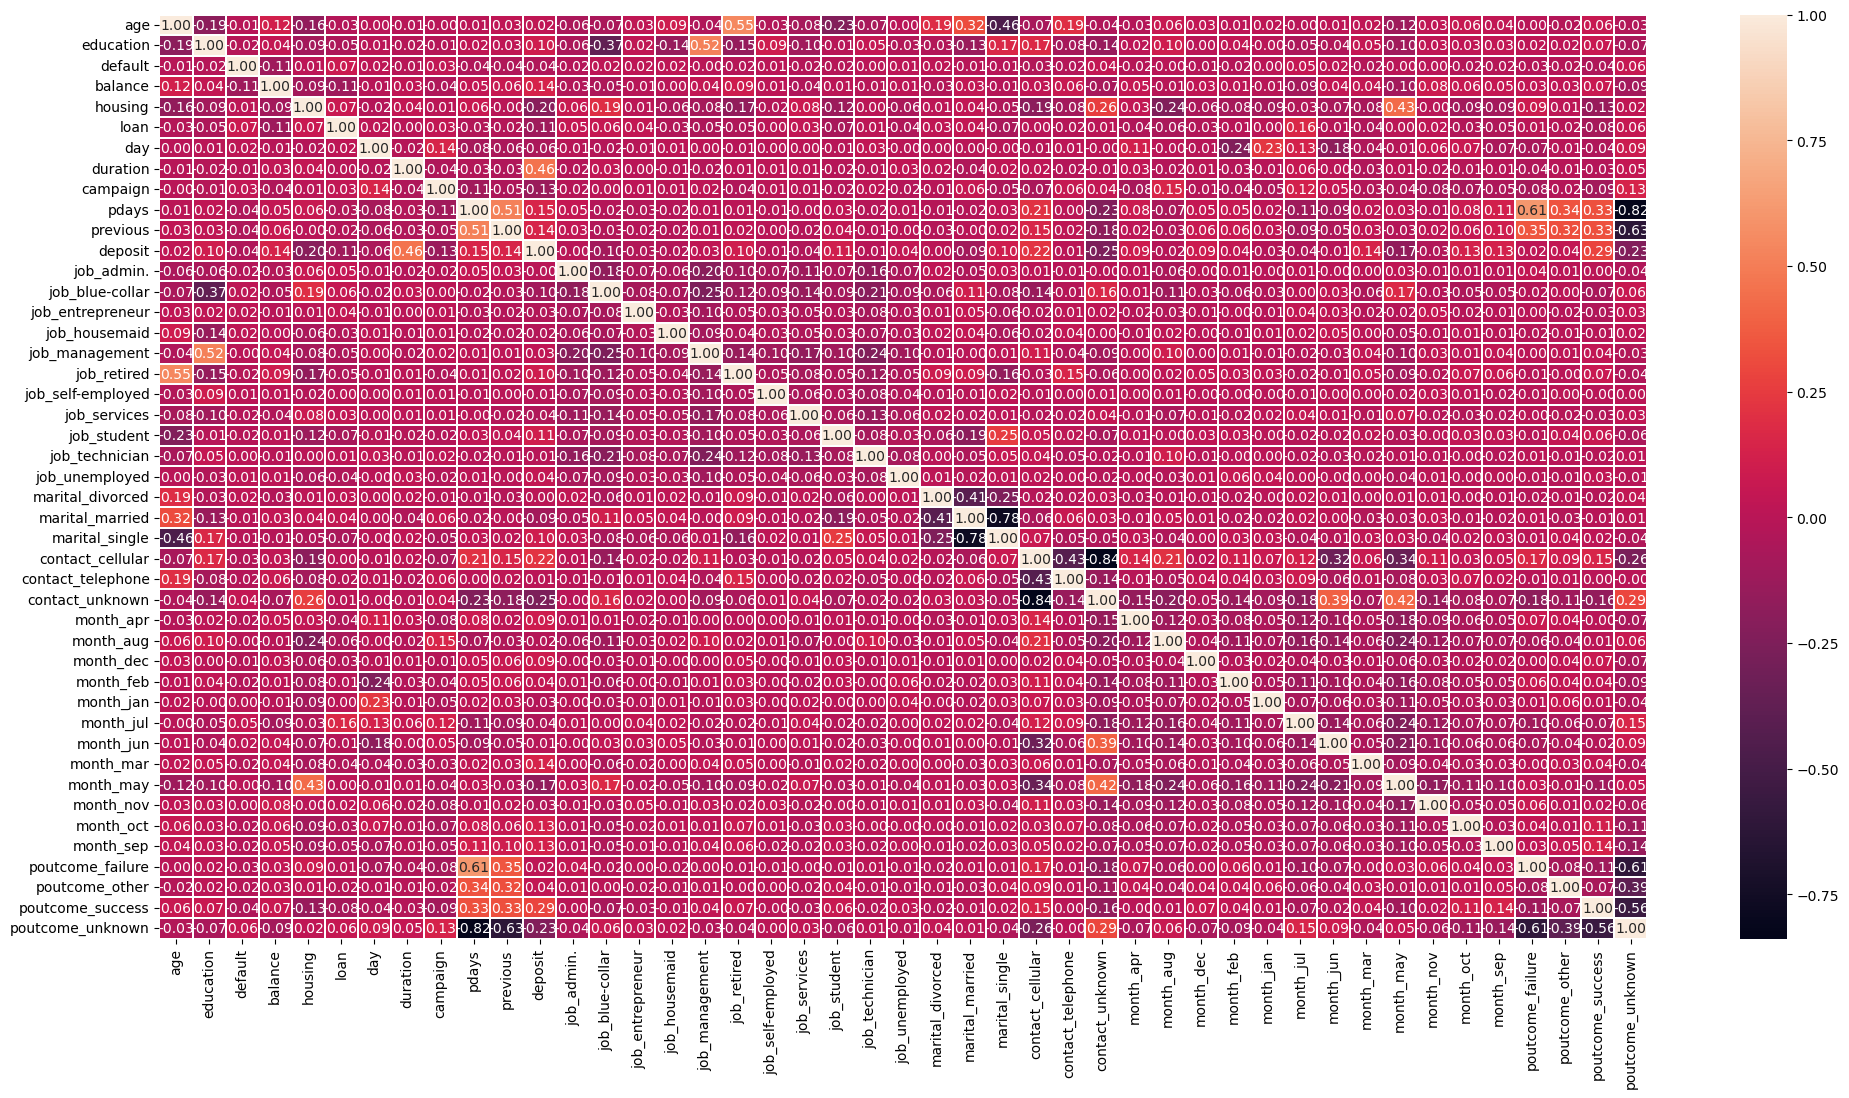

In [4010]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
f, ax = plt.subplots(figsize=(24,12))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=.01, ax=ax )

In [4011]:
# TODO
# В качестве дополнения визуализации к этому заданию постройте столбчатую диаграмму для ранжированных коэффициентов корреляции.

### Tasks 7 и 8

In [4012]:
X = data.drop(['deposit'], axis=1)
y = data['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [4013]:
# рассчитайте необходимые показатели
print(f"Testing population contains {X_test.shape[0]} items.")
print(f"Mean value of the target feautre in the testing population is {round(y_test.mean(),2)}")

Testing population contains 3335 items.
Mean value of the target feautre in the testing population is 0.46


### Task 9

<AxesSubplot: >

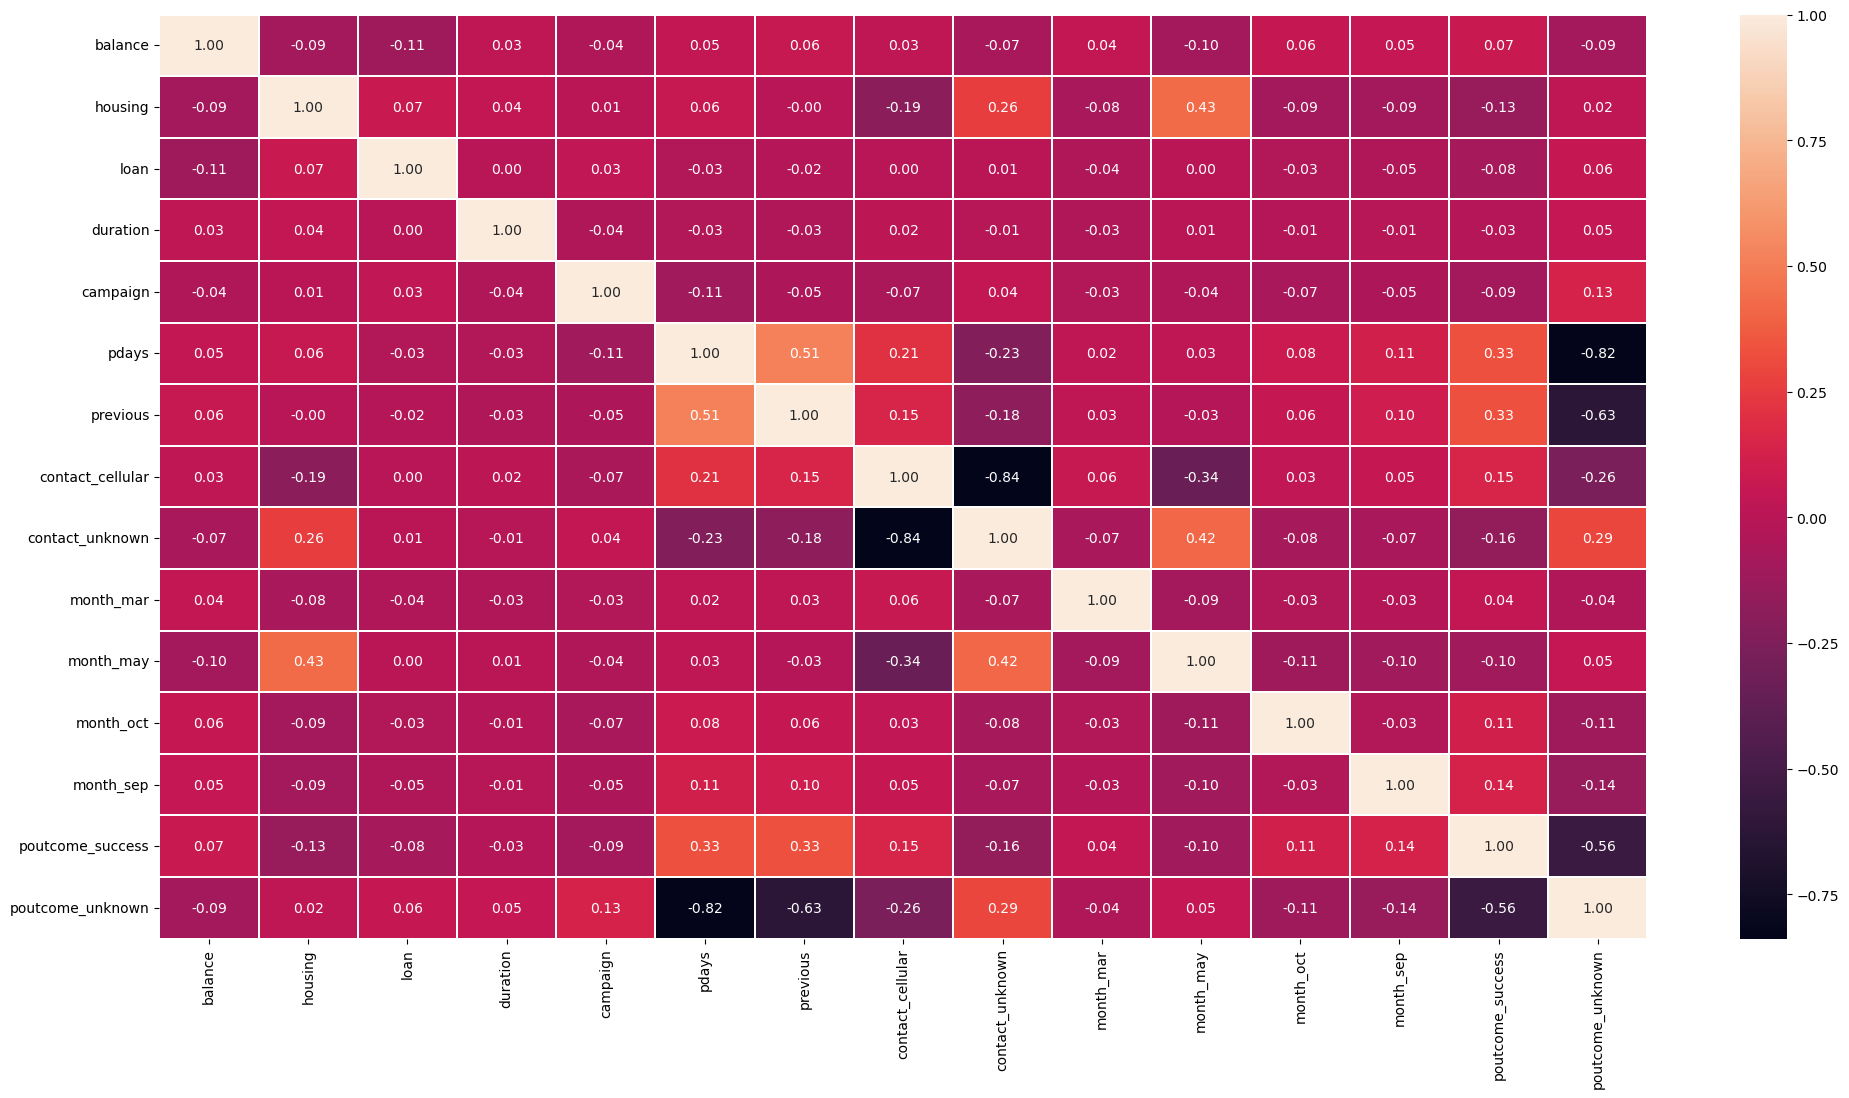

In [4014]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)

# saving best 15 features into new variable
final_features = selector.get_feature_names_out()

# visualising correlation of best 15 features
f, ax = plt.subplots(figsize=(24,12))
sns.heatmap(data=data[final_features].corr(), annot=True, fmt='.2f', linewidths=.01, ax=ax )

In [4015]:
# keeping only best 15 features
X_train = X_train[final_features]
X_test = X_test[final_features]

### Task 10

In [4016]:
# нормализуйте данные с помощью minmaxsxaler

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [4017]:
# обучите логистическую регрессию и рассчитайте метрики качества

log_reg = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000 )

# fitting the model
log_reg.fit(X_train_scaled, y_train)

# making prediction
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

# printing out classification reports and accuracy metric
print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y_test, y_pred_test))
print(f"Accruacy metric of the testing population is {round(metrics.accuracy_score(y_test, y_pred),2)}.")

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.73      0.78      1545

    accuracy                           0.80      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.80      0.80      3335

Accruacy metric of the testing population is 0.8.


### Задания 2,3,4

In [4018]:
# обучите решающие деревья, настройте максимальную глубину

dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=8
)

dt.fit(X_train_scaled, y_train)

# making prediction
y_pred_train = dt.predict(X_train_scaled)
y_pred_test = dt.predict(X_test_scaled)

# checking the accuracy
print(f"Accruacy metric of the train population is {round(metrics.accuracy_score(y_train, y_pred_train),2)}.")
print(f"Accruacy metric of the testing population is {round(metrics.accuracy_score(y_test, y_pred_test),2)}.")

Accruacy metric of the train population is 0.83.
Accruacy metric of the testing population is 0.8.


In [4019]:
# creating an empty dataframe in which we will add accuracy scores for both population with different max_depth value
accuracy_score = pd.DataFrame(columns=['max_depth', 'population', 'accuracy',])

# creating a loop to try different tree_depths
for tree_depth in range(2,20):
    dt = tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42,
        max_depth=tree_depth
    )

    # fitting the model 
    dt.fit(X_train_scaled, y_train)

    # making prediction
    y_pred_train = dt.predict(X_train_scaled)
    y_pred_test = dt.predict(X_test_scaled)

    # adding accuracies for testing population
    accuracy_score = accuracy_score.append({
        'max_depth': tree_depth,
        'population': 'test',
        'accuracy': metrics.accuracy_score(y_test, y_pred_test)},
        ignore_index=True
    )

    # adding accuracies for taining population
    accuracy_score = accuracy_score.append({
        'max_depth': tree_depth,
        'population': 'train',
        'accuracy': metrics.accuracy_score(y_train, y_pred_train)},
        ignore_index=True
    )

print(accuracy_score.head(4))

  max_depth population  accuracy
0         2       test  0.717841
1         2      train  0.728804
2         3       test  0.770315
3         3      train  0.775775


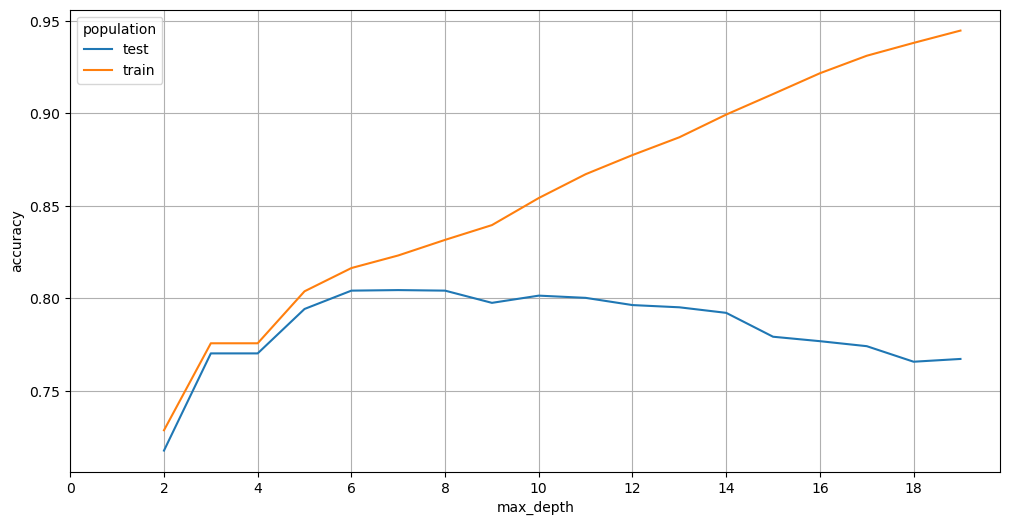

In [4020]:
# drawing a line plot to visualize results
f, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='max_depth', y='accuracy', hue='population', data=accuracy_score, ax=ax)
ax.grid(True)
ax.set_xticks(range(0, 20, 2)) 
plt.show()

### Задание 5

In [4021]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV

parameters =  {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7]}

model_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), 
                        parameters,
                        cv=5, 
                        scoring=('f1'), 
                        return_train_score=True,
                        n_jobs=-1)

model_cv.fit(X_train_scaled, y_train)

print("Best parameters are: {}".format(model_cv.best_params_))

y_test_pred = model_cv.predict(X_test_scaled)
print('f1_score on the testing population is: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Best parameters are: {'max_depth': 7, 'min_samples_split': 10}
f1_score on the testing population is: 0.79


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [4022]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
# fitting the model
rf.fit(X_train_scaled, y_train)

# making prediction
y_pred_test = rf.predict(X_test_scaled)

# checking the accuracy
print(f"Accruacy metric of the testing population is {round(metrics.accuracy_score(y_test, y_pred_test),2)}.")
print(f"Recall metric of the testing population is {round(metrics.recall_score(y_test, y_pred_test),2)}.")

Accruacy metric of the testing population is 0.83.
Recall metric of the testing population is 0.83.


### Задания 2 и 3

In [4023]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)

# fitting the model
gb.fit(X_train_scaled, y_train)

# making prediction
y_pred_test = gb.predict(X_test_scaled)

# checking the accuracy
print(f"F1 score of the testing population is {round(metrics.f1_score(y_test, y_pred_test),2)}.")


F1 score of the testing population is 0.81.


### Задание 4

In [4024]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)

# fitting the model
stack.fit(X_train_scaled, y_train)

# making prediction
y_pred_test = stack.predict(X_test_scaled)

# checking the precision score
print(f"Precision score of the testing population is {round(metrics.precision_score(y_test, y_pred_test),2)}.")

Precision score of the testing population is 0.81.


### Задание 5

Feature: 0, Score: 0.06192
Feature: 1, Score: 0.05046
Feature: 2, Score: 0.01271
Feature: 3, Score: 0.51414
Feature: 4, Score: 0.01801
Feature: 5, Score: 0.05541
Feature: 6, Score: 0.00763
Feature: 7, Score: 0.00199
Feature: 8, Score: 0.07896
Feature: 9, Score: 0.02703
Feature: 10, Score: 0.01468
Feature: 11, Score: 0.01952
Feature: 12, Score: 0.01561
Feature: 13, Score: 0.11899
Feature: 14, Score: 0.00294


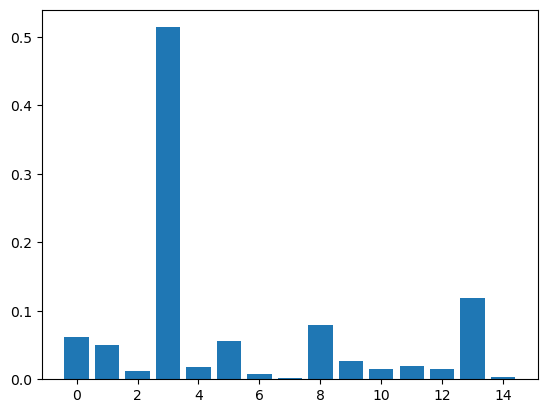

In [4027]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

importance = gb.feature_importances_
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i, v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
# TODO #IMPORTANT 